Elaborado por:

Eliseo Adrian Cardenas Ortiz 19020081
Yolanda Chavez Gutierrez 19020083

In [9]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [10]:
mipath = "australian.dat"
data = pd.read_csv(mipath, sep=" ",header=None)
data.columns = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","class"]
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [11]:
#Particiones
X=data.iloc[:,:-1]#todas las lineas,todas las columnas, menos la ultima
y=data[["class"]]#solo class

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,random_state=45)

BOSQUE ALEATORIO

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)


/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/436068558.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


In [15]:
#score
rfc.score(X_test,y_test)

0.8985507246376812

1. En un ciclo for el modelo base

/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/3159031494.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

Bosque aleatorio con párametros por default 
 Promedio y desviación estándar: 88.4% (0.5)


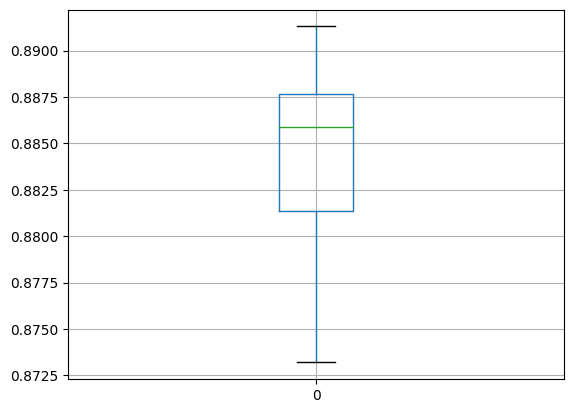

In [16]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('Bosque aleatorio con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [17]:
accAD

[0.8876811594202898,
 0.8840579710144928,
 0.8876811594202898,
 0.8731884057971014,
 0.8876811594202898,
 0.8840579710144928,
 0.8913043478260869,
 0.8804347826086957,
 0.8876811594202898,
 0.8804347826086957]

2. En un ciclo for el modelo con hiper parámetros 

/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_AD.fit(X_train,y_train)
/var/folders/fr/bnkyfh89607054zzr9l1d0_80000gn/T/ipykernel_831/2576192619.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Bosque Aleatorio con párametros por default 
 Promedio y desviación estándar: 89.5% (0.4)


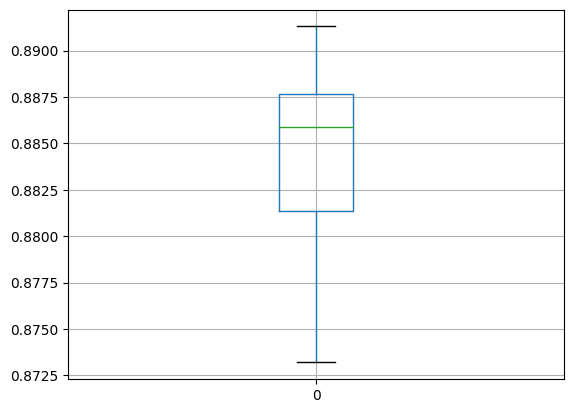

In [18]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = RandomForestClassifier(n_estimators=100, # número de árboles aleatorios a generar para el bosque.
                                        criterion="gini", # función que se mide la calidad de cada división en cada nodo.
                                        max_depth=None, # profundidad máxima de cada árbol.
                                        min_samples_split=2, # mínimo de datos que debe haber en un nodo para continuar dividiéndolo.
                                        min_samples_leaf=1, # mínimo de datos que deben quedar en cada hoja después de cada división.
                                        max_features=12) # máximo de variables a seleccionar aleatoriamente en cada árbol del bosque.)

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('Bosque Aleatorio con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [19]:
accAD2

[0.8913043478260869,
 0.8985507246376812,
 0.894927536231884,
 0.8985507246376812,
 0.894927536231884,
 0.894927536231884,
 0.894927536231884,
 0.9021739130434783,
 0.8876811594202898,
 0.894927536231884]

LINEAR SUPPORT VECTOR CLASSIFIER

In [20]:
from sklearn.svm import LinearSVC


In [21]:
#crear instancia
linear = LinearSVC()
#entrenamiento
linear.fit(X_train, y_train)
#score
linear.score(X_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8442028985507246

3. Graficar los boxplot, ambos que se muestren en la misma gráfica. 

In [22]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.887681,0.891304
1,0.884058,0.898551
2,0.887681,0.894928
3,0.873188,0.898551
4,0.887681,0.894928
5,0.884058,0.894928
6,0.891304,0.894928
7,0.880435,0.902174
8,0.887681,0.887681
9,0.880435,0.894928


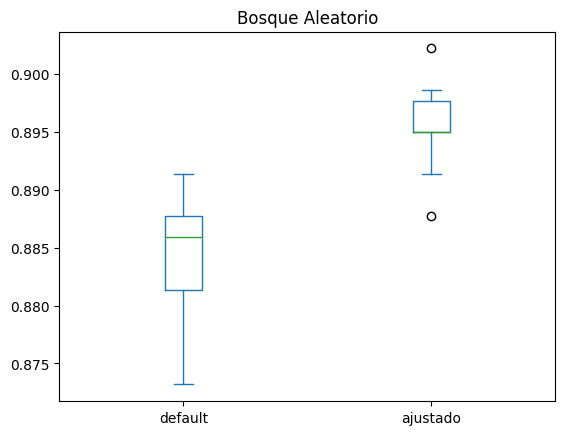

In [23]:
ddff.plot(kind='box')
plt.title('Bosque Aleatorio')
plt.show()

1. En un ciclo for el modelo base

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

LinearSVC con párametros por default 
 Promedio y desviación estándar: 78.4% (6.9)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

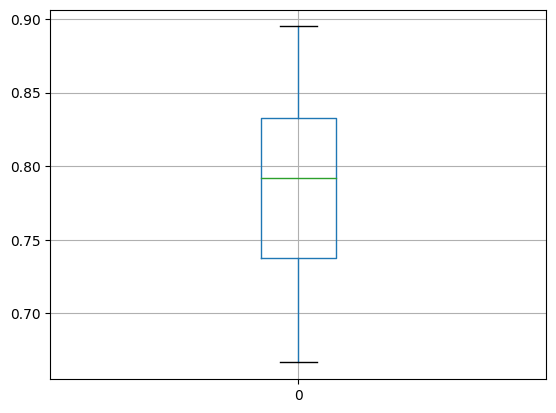

In [24]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = LinearSVC()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('LinearSVC con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [25]:
accAD

[0.6666666666666666,
 0.6884057971014492,
 0.894927536231884,
 0.8442028985507246,
 0.8297101449275363,
 0.7753623188405797,
 0.7753623188405797,
 0.8079710144927537,
 0.8333333333333334,
 0.7246376811594203]

2. En un ciclo for el modelo con hiper parámetros 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/uti

LinearSVC con párametros por default 
 Promedio y desviación estándar: 89.1% (0.0)


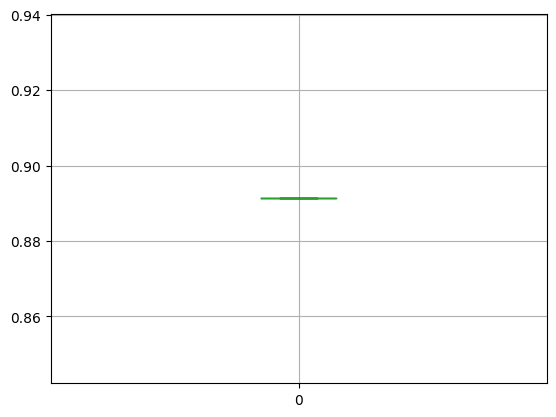

In [26]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = LinearSVC(C= 0.1,
                          penalty = "l1",
                          dual=False)

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('LinearSVC con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD2).boxplot()
plt.show()

In [27]:
accAD2

[0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869]

3. Graficar los boxplot, ambos que se muestren en la misma gráfica. 

In [28]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.666667,0.891304
1,0.688406,0.891304
2,0.894928,0.891304
3,0.844203,0.891304
4,0.829710,0.891304
5,0.775362,0.891304
6,0.775362,0.891304
7,0.807971,0.891304
8,0.833333,0.891304
9,0.724638,0.891304


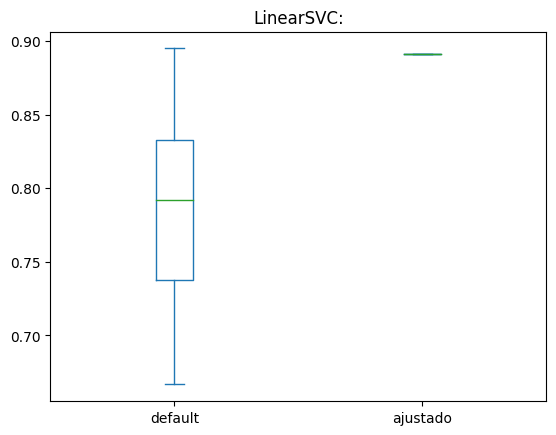

In [29]:
ddff.plot(kind='box')
plt.title('LinearSVC:')
plt.show()

4. ¿Qué modelo arroja mejores scores? 

El Bosque aleatorio arroja mejores scores, la diferencia es poca pero aumenta en un 0.01 en comparacion con el modelo LinearSVC



CROSSVALIDATION para Random Forest

In [30]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [31]:
#lo primero que tenemos que hacer es crear nuestra malla de datos

grid = {
    'n_estimators' : [200,300,400,500],
    'max_features' : ['sqrt','log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini','entropy'],
    'random_state' : [10]
}

In [32]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=5)
rf_cv.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [10]})

In [33]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 10}

In [34]:
#Entrenamiento con los mejores hiperparametros
rf2 = RandomForestClassifier(n_estimators=200,
                             max_depth=7,
                             max_features='sqrt',
                             random_state=10,
                             criterion='gini').fit(X_train,np.ravel(y_train))

In [35]:
y_pred = rf2.predict(X_test)
accuracy_score(y_test,y_pred)

0.8876811594202898

In [36]:
confusion_matrix(y_test,y_pred)

array([[149,  13],
       [ 18,  96]])

CROSSVALIDATION para LinearSVC

In [47]:
#Libreria necesaria para GridSearchCV
from sklearn import svm

In [48]:
#malla para el modelo LinearSVC
grid2 = {
    'C' : [0.1,0.5,2],
    'penalty' : ["l1","l2"],
    'loss' : ["hinge","squared_hinge"],
    'dual' : [False]
}

In [49]:
lsvc_cv = GridSearchCV(estimator=svm.LinearSVC(),param_grid=grid2,cv=5)
lsvc_cv.fit(X_train,np.ravel(y_train))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 0.5, 2], 'dual': [False],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [50]:
#mejores parametros
lsvc_cv.best_params_

{'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}

In [51]:
#Entrenamiento con los mejores hiperparametros
lsvc2 = LinearSVC(C=0.1,
                  dual=False,
                  loss='squared_hinge',
                  penalty='l1').fit(X_train,np.ravel(y_train))

In [52]:
#Prediccion y score
y_pred = lsvc2.predict(X_test)
accuracy_score(y_test,y_pred)

0.8913043478260869

In [53]:
#Matriz de confusion
confusion_matrix(y_test,y_pred)

array([[142,  20],
       [ 10, 104]])